In [94]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
# from sklearn.linear_model import LinearRegression, BayesianRidge
# from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

## Pateint Info Analysis

In [95]:
PatientInfo = pd.read_csv(r'C:\Users\E870859\Desktop\Data Science\7. Exploratory data analysis\Country - Covid 19\South Korea\PatientInfo.csv')
PatientInfo_Copy = PatientInfo

------------- Data Cleaning --------------

In [96]:
PatientInfo.isna().sum()

patient_id               0
global_num            1160
sex                     94
birth_year             464
age                    105
country                 90
province                 0
city                    76
disease               3110
infection_case         819
infection_order       3097
infected_by           2393
contact_number        2539
symptom_onset_date    2682
confirmed_date           0
released_date         2147
deceased_date         3072
state                    0
dtype: int64

In [97]:
PatientInfo.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')

In [98]:
PatientInfo["disease"] = PatientInfo["disease"].fillna("False")
PatientInfo["city"] = PatientInfo["city"].fillna("Unknown")
PatientInfo["country"] = PatientInfo["country"].fillna("Unknown")
PatientInfo["contact_number"] = PatientInfo["contact_number"].fillna("0")
PatientInfo["infected_by"] = PatientInfo["infected_by"].fillna("0")
PatientInfo["deceased_date"] = PatientInfo["deceased_date"].fillna("None")
PatientInfo["released_date"] = PatientInfo["released_date"].fillna("None")
PatientInfo["symptom_onset_date"] = PatientInfo["symptom_onset_date"].fillna("None")
PatientInfo["sex"] = PatientInfo["sex"].fillna("Unknown")
PatientInfo["infection_case"] = PatientInfo["infection_case"].fillna("Others")
PatientInfo.isna().sum()

patient_id               0
global_num            1160
sex                      0
birth_year             464
age                    105
country                  0
province                 0
city                     0
disease                  0
infection_case           0
infection_order       3097
infected_by              0
contact_number           0
symptom_onset_date       0
confirmed_date           0
released_date            0
deceased_date            0
state                    0
dtype: int64

In [99]:
PatientInfo = PatientInfo.drop(['global_num','birth_year','infection_order',
                                'symptom_onset_date','released_date','deceased_date'], axis=1)

In [100]:
PatientInfo["age"] = PatientInfo["age"].str.replace("s","").astype(float)

In [101]:
## Updating null values in age column by using mean number
index_NaN_age = list(PatientInfo["age"][PatientInfo["age"].isnull()].index)
index_NaN_age

for i in index_NaN_age :
    age_med = PatientInfo["age"].mean()
    age_pred = PatientInfo["age"].mean()
    if not np.isnan(age_pred) :
        PatientInfo["age"].iloc[i] = age_pred
    else :
        PatientInfo["age"].iloc[i] = age_med

C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [102]:
# #Converting certain features to categorical form
categorical_features = ['sex', 'country','province','city', 'disease',
                        'infection_case', 'state']
PatientInfo[categorical_features] = PatientInfo[categorical_features].astype('category')
PatientInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 12 columns):
patient_id        3128 non-null int64
sex               3128 non-null category
age               3128 non-null float64
country           3128 non-null category
province          3128 non-null category
city              3128 non-null category
disease           3128 non-null category
infection_case    3128 non-null category
infected_by       3128 non-null object
contact_number    3128 non-null object
confirmed_date    3128 non-null object
state             3128 non-null category
dtypes: category(7), float64(1), int64(1), object(3)
memory usage: 155.2+ KB


In [103]:
# #Converting certain features to Numerical form
Numerical_features = ['contact_number','infected_by']
PatientInfo[Numerical_features] = PatientInfo[Numerical_features].astype('int64')
PatientInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 12 columns):
patient_id        3128 non-null int64
sex               3128 non-null category
age               3128 non-null float64
country           3128 non-null category
province          3128 non-null category
city              3128 non-null category
disease           3128 non-null category
infection_case    3128 non-null category
infected_by       3128 non-null int64
contact_number    3128 non-null int64
confirmed_date    3128 non-null object
state             3128 non-null category
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 155.2+ KB


In [104]:
## Converting Date column to Date form
from datetime import datetime, timedelta
from pandas import DataFrame
PatientInfo['confirmed_date'] = PatientInfo['confirmed_date'].astype('datetime64[ns]') 

In [105]:
PatientInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 12 columns):
patient_id        3128 non-null int64
sex               3128 non-null category
age               3128 non-null float64
country           3128 non-null category
province          3128 non-null category
city              3128 non-null category
disease           3128 non-null category
infection_case    3128 non-null category
infected_by       3128 non-null int64
contact_number    3128 non-null int64
confirmed_date    3128 non-null datetime64[ns]
state             3128 non-null category
dtypes: category(7), datetime64[ns](1), float64(1), int64(3)
memory usage: 155.2 KB


## Data Visualization

In [106]:
import seaborn as sns

# def categorical_eda(df):
#     """Given dataframe, generate EDA of categorical data"""
#     print("To check: Unique count of non-numeric data")
#     print(df.select_dtypes(include=['category']).nunique())
#     # Plot count distribution of categorical data
    
#     for col in df.select_dtypes(include='category').columns:
#         if df[col].nunique() < 20:
#             fig = sns.catplot(x=col,hue='state', kind="count", data=df)
#             fig.set_xticklabels(rotation=90)
#             plt.show()
        
        
# categorical_eda(PatientInfo)

C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


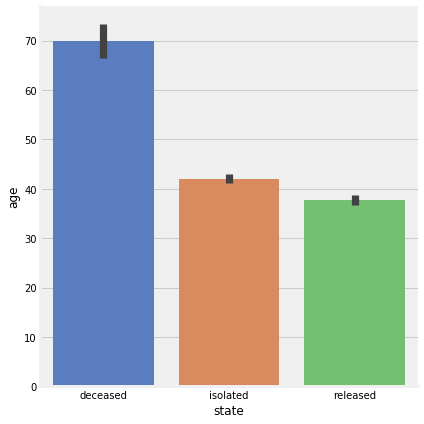

In [107]:
############# Current Status ################
g  = sns.factorplot(y="age",x="state",data=PatientInfo,kind="bar", size = 6 , palette = "muted")

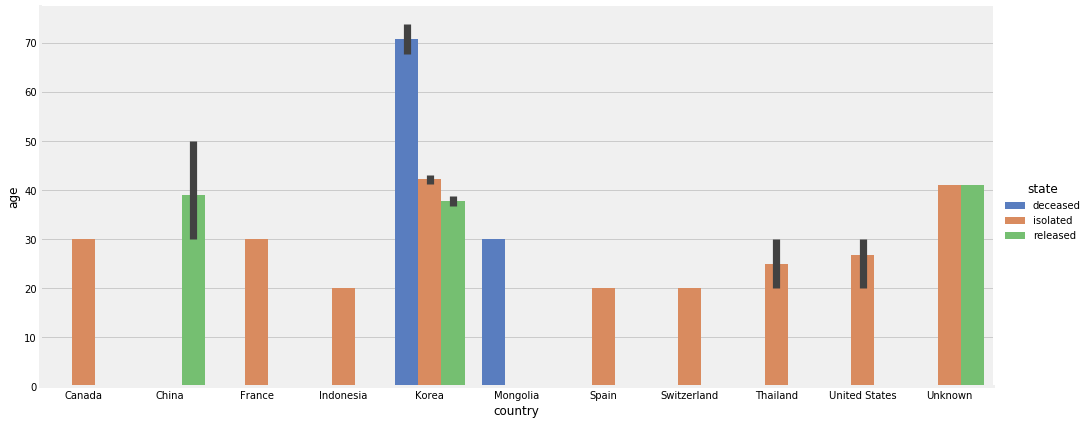

In [108]:
#############  Patients State by age group and province  ###########
g  = sns.factorplot(y="age",x="country",data=PatientInfo, hue = "state", kind="bar", size = 6 ,
                    palette = "muted",height=8.27, aspect=11.7/5)

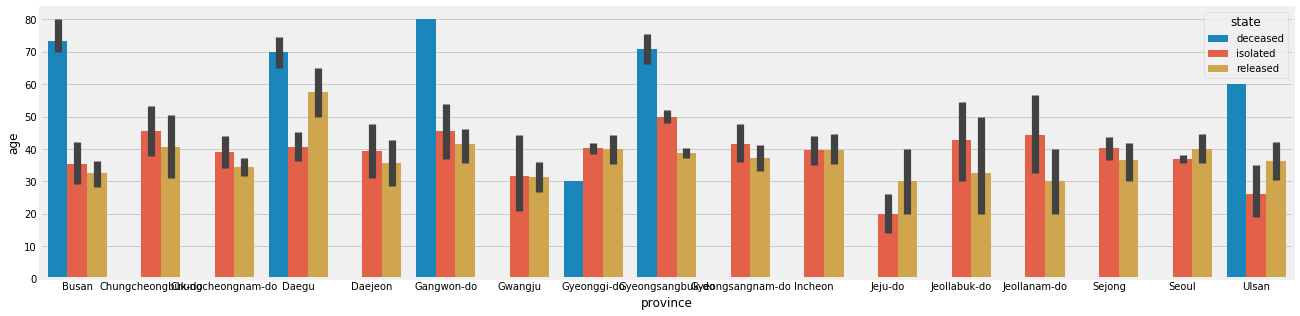

In [109]:
#############  Patients State by age group and province  ###########
fig,axes = plt.subplots(1,1,figsize=(20,5))
g = sns.barplot(y="age",x="province",data=PatientInfo,hue = "state")

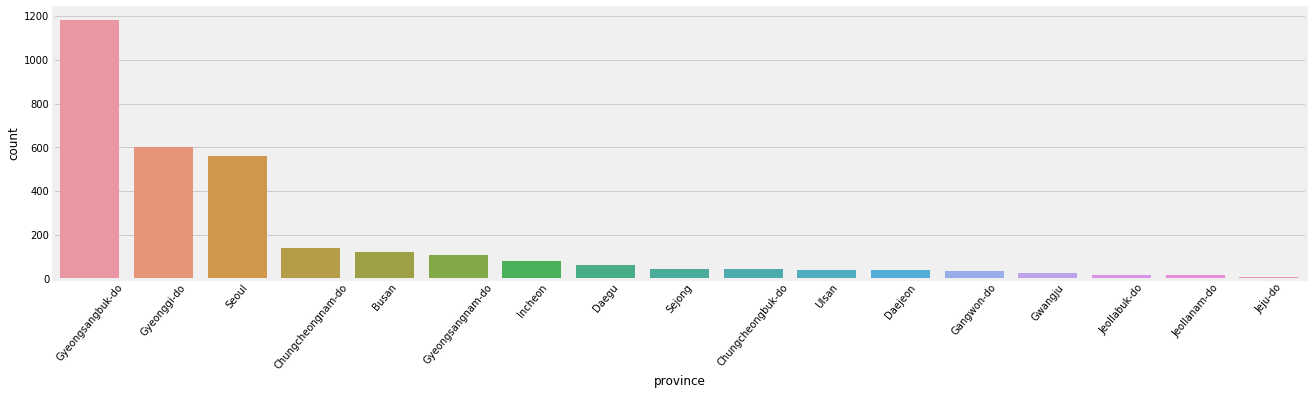

In [110]:
########## Top 20 infected province #############
fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.countplot(PatientInfo.province, order = PatientInfo.province.value_counts()[:20].index)
plt.xticks(rotation = 50)
plt.show()

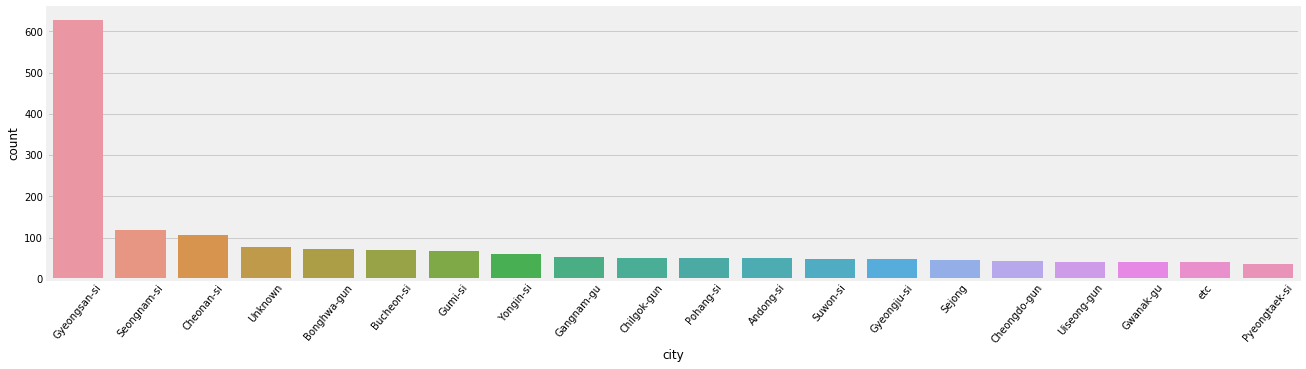

In [111]:
########## Top 20 infected cities #############
fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.countplot(PatientInfo.city, order = PatientInfo.city.value_counts()[:20].index)
plt.xticks(rotation = 50)
plt.show()

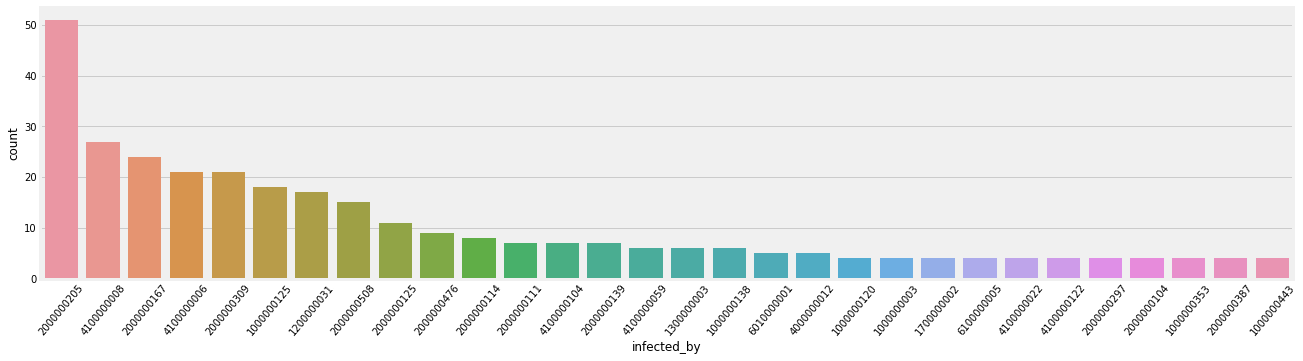

In [112]:
#### Most infection casued by Patients ############
Infected_by = PatientInfo[PatientInfo["infected_by"] != 0 ]

fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.countplot(Infected_by.infected_by, order = Infected_by.infected_by.value_counts()[:30].index)
plt.xticks(rotation = 50)
plt.show()

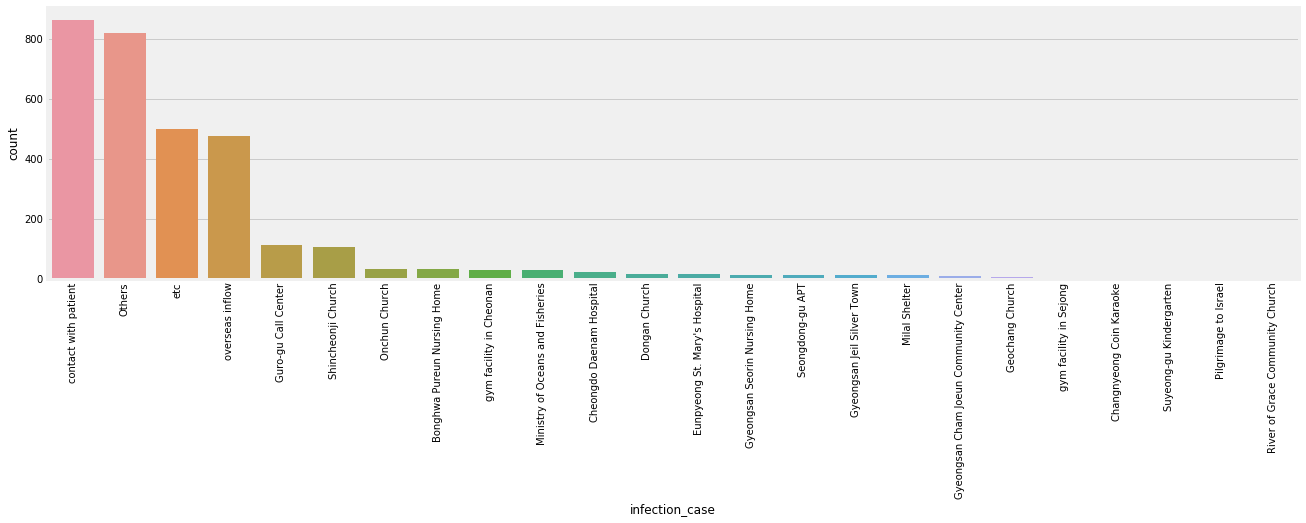

In [113]:
######## infection_case Analysis #####
fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.countplot(PatientInfo.infection_case, order = PatientInfo.infection_case.value_counts()[:30].index)
plt.xticks(rotation = 90)
plt.show()

-------------Time Series Analysis-----------------

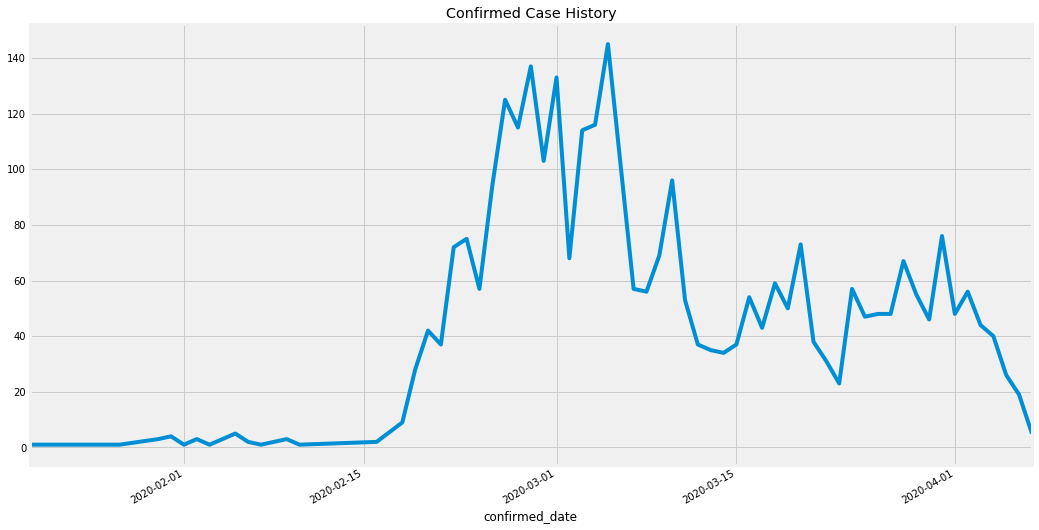

In [114]:
Confirmed_Cases = PatientInfo.groupby('confirmed_date').count()
plt.figure(figsize=(16, 9))
Confirmed_Case_History = Confirmed_Cases['infection_case'].plot(title = "Confirmed Case History")

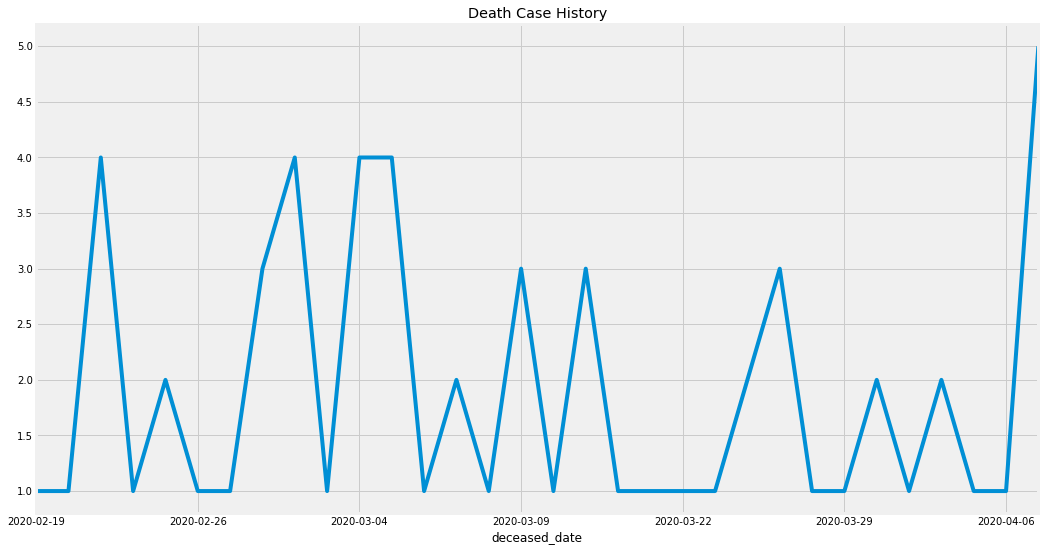

In [115]:
Death_History = PatientInfo_Copy[PatientInfo_Copy['state']=='deceased'].groupby('deceased_date').count()
plt.figure(figsize=(16, 9))
Death_Case_History = Death_History['infection_case'].plot(title = "Death Case History")

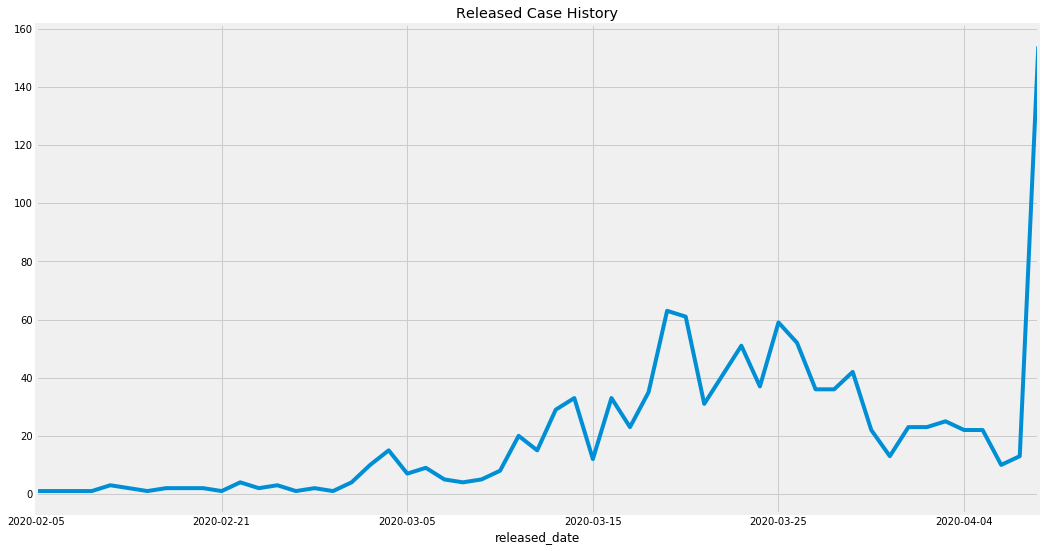

In [116]:
Released_History = PatientInfo_Copy[PatientInfo_Copy['state']=='released'].groupby('released_date').count()
plt.figure(figsize=(16, 9))
Released_Case_History = Released_History['infection_case'].plot(title = "Released Case History")

### Patient Route Analysis

In [117]:
PatientRoute = pd.read_csv(r'C:\Users\E870859\Desktop\Data Science\7. Exploratory data analysis\Country - Covid 19\South Korea\PatientRoute.csv')
PatientRoute_Copy = PatientRoute

In [118]:
PatientRoute

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
...,...,...,...,...,...,...,...,...
5316,6100000090,NaN,2020-03-24,Seoul,Gangseo-gu,airport,37.558654,126.794474
5317,6100000090,NaN,2020-03-24,Busan,Gangseo-gu,airport,35.173220,128.946459
5318,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389
5319,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,hospital,35.335757,129.025003


In [119]:
PatientInfo.isna().sum()

patient_id        0
sex               0
age               0
country           0
province          0
city              0
disease           0
infection_case    0
infected_by       0
contact_number    0
confirmed_date    0
state             0
dtype: int64

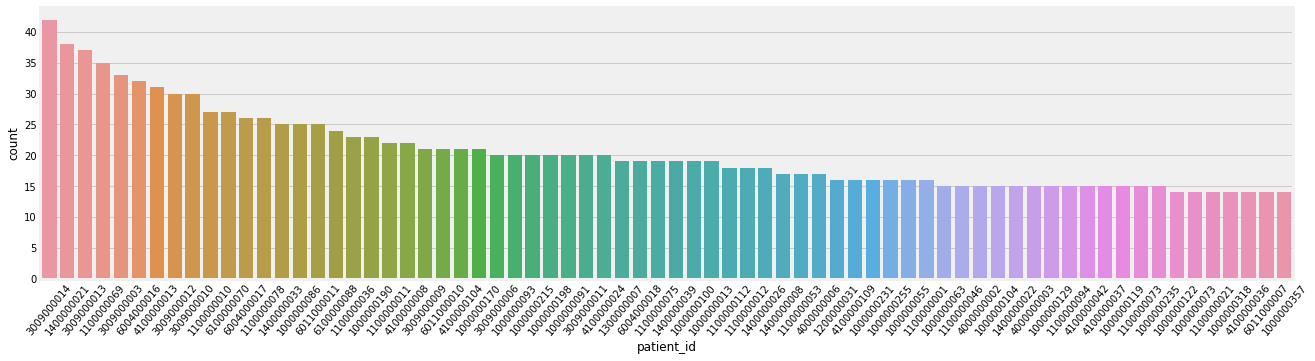

In [120]:
#### Most infection casued by Patients ############
# Infected_by = PatientInfo[PatientInfo["infected_by"] != 0 ]

fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.countplot(PatientRoute.patient_id, order = PatientRoute.patient_id.value_counts()[:70].index)
plt.xticks(rotation = 50)
plt.show()

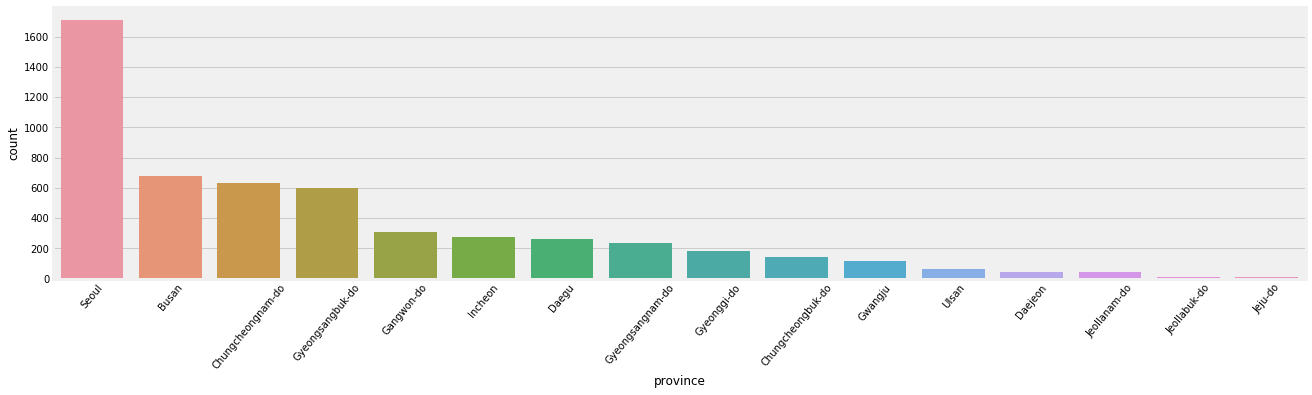

In [121]:
#### Most infection casued by Patients ############
# Infected_by = PatientInfo[PatientInfo["infected_by"] != 0 ]

fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.countplot(PatientRoute.province, order = PatientRoute.province.value_counts()[:70].index)
plt.xticks(rotation = 50)
plt.show()

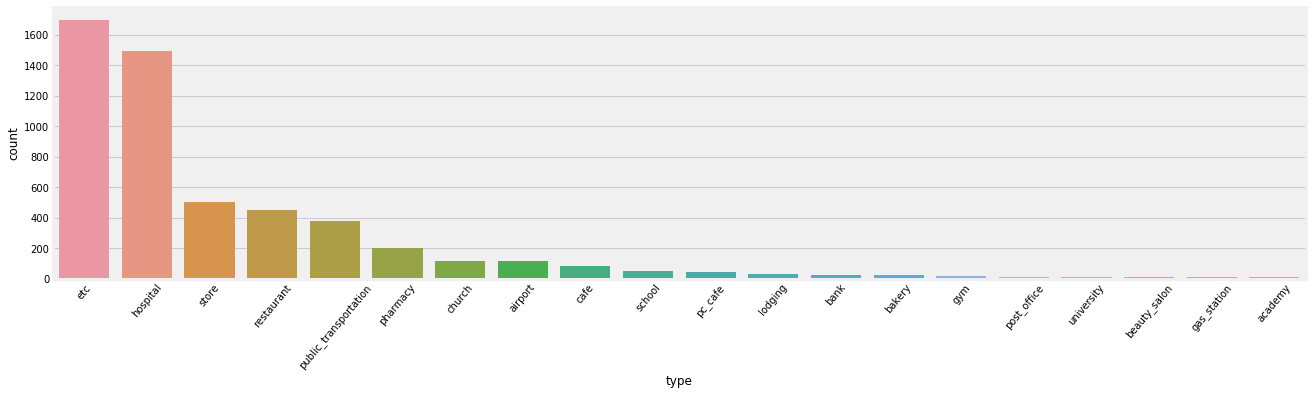

In [122]:
#### Most infection_case ############
# Infected_by = PatientInfo[PatientInfo["infected_by"] != 0 ]

fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.countplot(PatientRoute.type, order = PatientRoute.type.value_counts()[:70].index)
plt.xticks(rotation = 50)
plt.show()

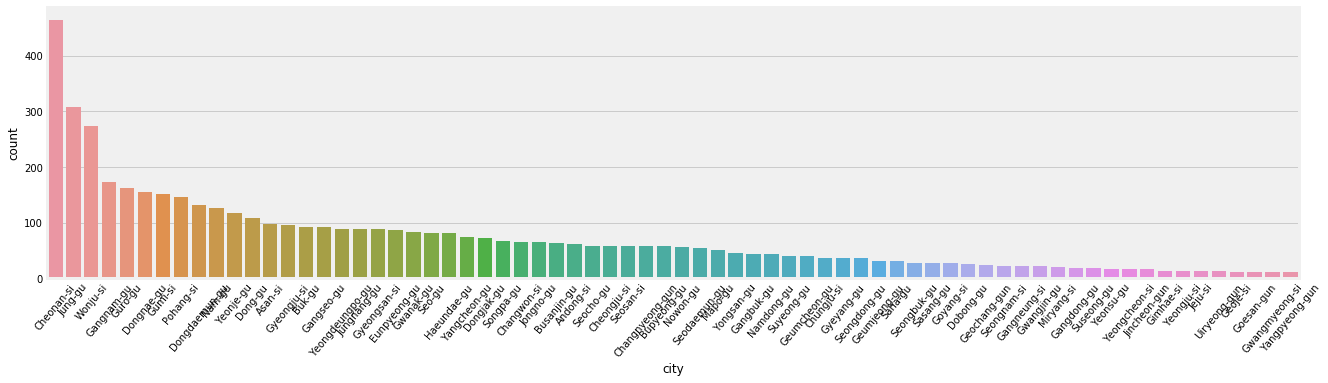

In [123]:
#### Most infection casued in city ############
# Infected_by = PatientInfo[PatientInfo["infected_by"] != 0 ]

fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.countplot(PatientRoute.city, order = PatientRoute.city.value_counts()[:70].index)
plt.xticks(rotation = 50)
plt.show()

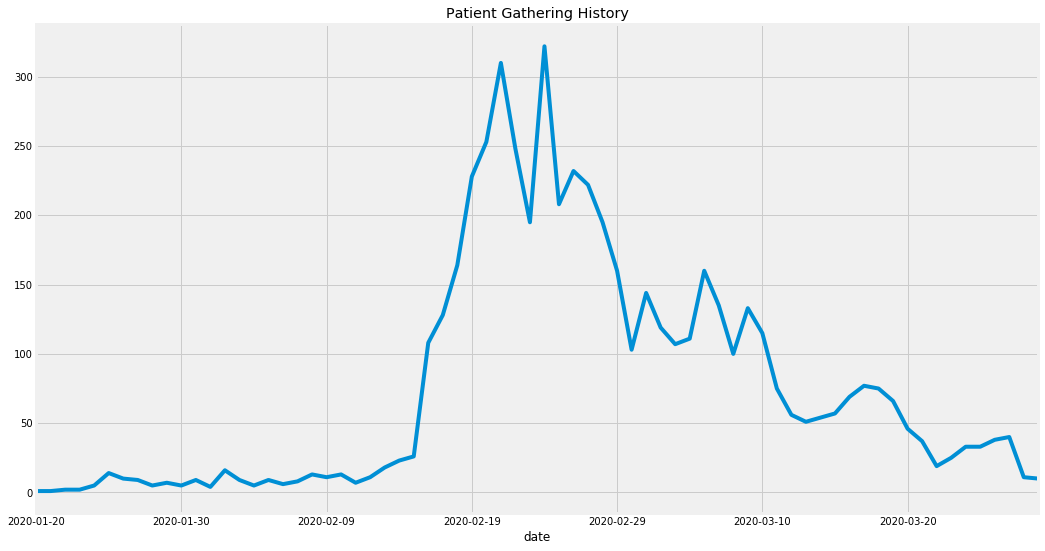

In [124]:
PatientRoute_History = PatientRoute.groupby('date').count()
plt.figure(figsize=(16, 9))
PatientRoute_History = PatientRoute_History['patient_id'].plot(title = "Patient Gathering History")

In [125]:
PatientRoute_details = PatientRoute.groupby('patient_id').count()
PatientRoute_details.reset_index(inplace = True) 
PatientRoute_details

PatientRoute_details = PatientRoute_details.drop([ 'global_num', 'date', 'city', 'type',
       'latitude', 'longitude'], axis=1)
PatientRoute_details.rename(columns = {'province':'Places_Visited'}, inplace = True)
result = pd.merge(PatientInfo,
                 PatientRoute_details[['patient_id', 'Places_Visited']],
                 on='patient_id')

In [126]:
result

,patient_id,sex,age,country,province,city,disease,infection_case,infected_by,contact_number,confirmed_date,state,Places_Visited
0,1000000001,male,50.0,Korea,Seoul,Gangseo-gu,False,overseas inflow,0,75,2020-01-23,released,2
1,1000000002,male,30.0,Korea,Seoul,Jungnang-gu,False,overseas inflow,0,31,2020-01-30,released,13
2,1000000003,male,50.0,Korea,Seoul,Jongno-gu,False,contact with patient,2002000001,17,2020-01-30,released,2
3,1000000004,male,20.0,Korea,Seoul,Mapo-gu,False,overseas inflow,0,9,2020-01-30,released,1
4,1000000005,female,20.0,Korea,Seoul,Seongbuk-gu,False,contact with patient,1000000002,2,2020-01-31,released,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,6100000086,male,50.0,Korea,Gyeongsangnam-do,Changwon-si,False,etc,0,0,2020-03-19,isolated,4
935,6100000087,female,50.0,Korea,Gyeongsangnam-do,Changwon-si,False,etc,0,0,2020-03-21,isolated,8
936,6100000088,male,20.0,Korea,Gyeongsangnam-do,Changwon-si,False,etc,0,0,2020-03-22,isolated,24
937,6100000089,male,60.0,Korea,Gyeongsangnam-do,Haman-gun,False,etc,6002000035,0,2020-03-23,isolated,2


### Time Age Analysis

In [127]:
TimeAge = pd.read_csv(r'C:\Users\E870859\Desktop\Data Science\7. Exploratory data analysis\Country - Covid 19\South Korea\TimeAge.csv')
TimeAge_Copy = TimeAge
TimeAge['date'] = TimeAge['date'].astype('datetime64[ns]') 
TimeAge.set_index('date')

,time,age,confirmed,deceased
date,,,,
2020-03-02,0,0s,32,0
2020-03-02,0,10s,169,0
2020-03-02,0,20s,1235,0
2020-03-02,0,30s,506,1
2020-03-02,0,40s,633,1
...,...,...,...,...
2020-04-07,0,40s,1382,2
2020-04-07,0,50s,1909,13
2020-04-07,0,60s,1304,26


In [128]:
TimeAge_0 = TimeAge[TimeAge['age'] == '0s'].set_index('date')
TimeAge_10 = TimeAge[TimeAge['age'] == '10s'].set_index('date')
TimeAge_20 = TimeAge[TimeAge['age'] == '20s'].set_index('date')
TimeAge_30 = TimeAge[TimeAge['age'] == '30s'].set_index('date')
TimeAge_40 = TimeAge[TimeAge['age'] == '40s'].set_index('date')
TimeAge_50 = TimeAge[TimeAge['age'] == '50s'].set_index('date')
TimeAge_60 = TimeAge[TimeAge['age'] == '60s'].set_index('date')
TimeAge_70 = TimeAge[TimeAge['age'] == '70s'].set_index('date')
TimeAge_80 = TimeAge[TimeAge['age'] == '80s'].set_index('date')
TimeAge_90 = TimeAge[TimeAge['age'] == '90s'].set_index('date')

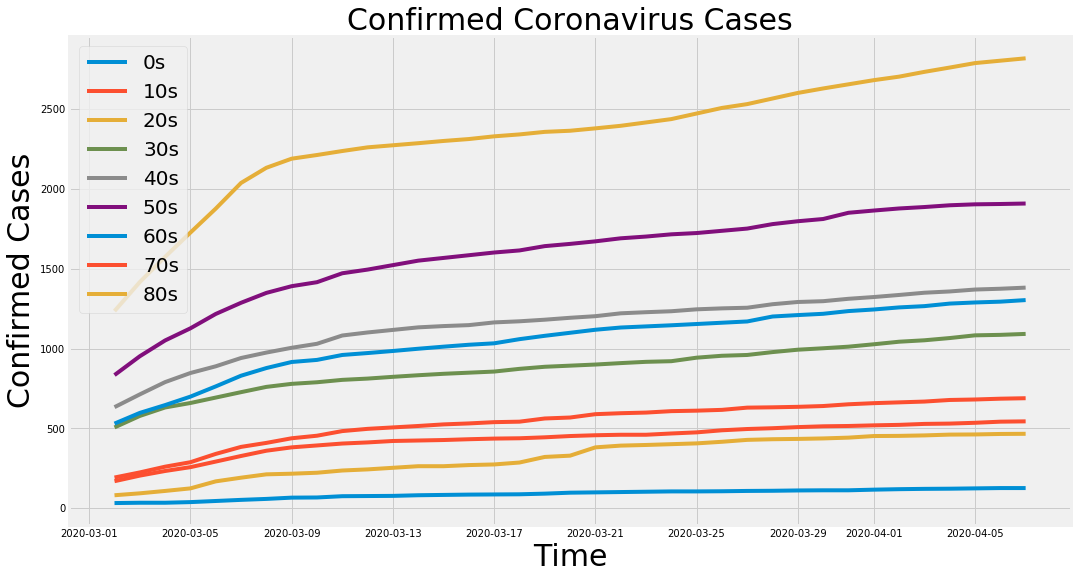

In [129]:
plt.figure(figsize=(16, 9))
plt.plot(TimeAge_0['confirmed'])
plt.plot(TimeAge_10['confirmed'])
plt.plot(TimeAge_20['confirmed'])
plt.plot(TimeAge_30['confirmed'])
plt.plot(TimeAge_40['confirmed'])
plt.plot(TimeAge_50['confirmed'])
plt.plot(TimeAge_60['confirmed'])
plt.plot(TimeAge_70['confirmed'])
plt.plot(TimeAge_80['confirmed'])
plt.title('Confirmed Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Confirmed Cases', size=30)
plt.legend(['0s', '10s', '20s', '30s', '40s','50s','60s','70s','80s'], prop={'size': 20})

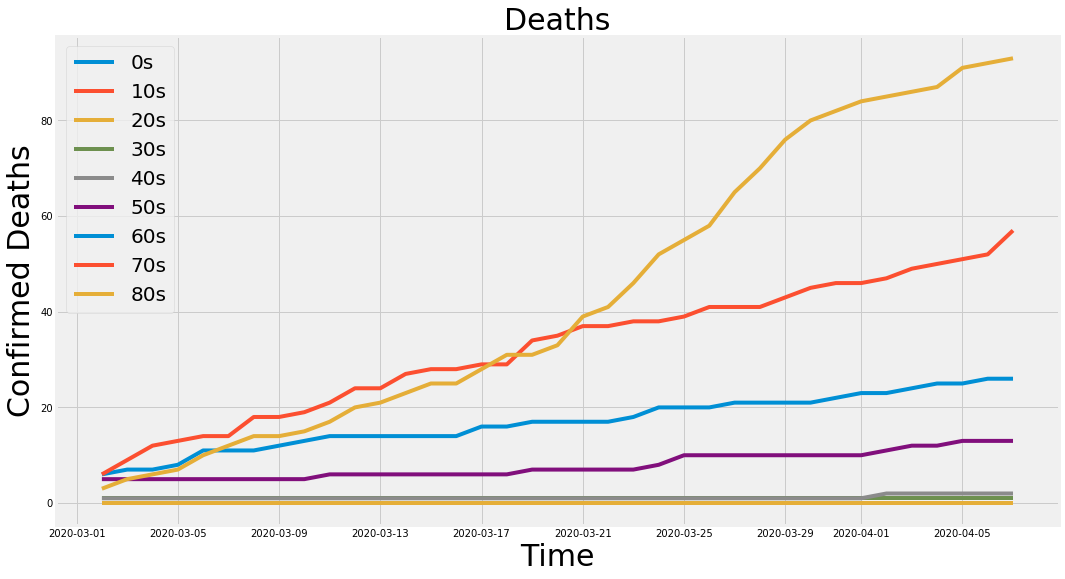

In [130]:
plt.figure(figsize=(16, 9))
plt.plot(TimeAge_0['deceased'])
plt.plot(TimeAge_10['deceased'])
plt.plot(TimeAge_20['deceased'])
plt.plot(TimeAge_30['deceased'])
plt.plot(TimeAge_40['deceased'])
plt.plot(TimeAge_50['deceased'])
plt.plot(TimeAge_60['deceased'])
plt.plot(TimeAge_70['deceased'])
plt.plot(TimeAge_80['deceased'])
plt.title('Deaths', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Confirmed Deaths', size=30)
plt.legend(['0s', '10s', '20s', '30s', '40s','50s','60s','70s','80s'], prop={'size': 20})

In [131]:
TimeAge_Copy

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
328,2020-04-07,0,40s,1382,2
329,2020-04-07,0,50s,1909,13
330,2020-04-07,0,60s,1304,26
331,2020-04-07,0,70s,689,57


In [132]:
TimeAge_Stat = TimeAge_Copy.groupby('age')['confirmed','deceased'].sum()
TimeAge_Stat.reset_index(inplace = True) 
TimeAge_Stat["age"] = TimeAge_Stat["age"].str.replace("s","").astype(float)

In [133]:
TimeAge_Stat

,age,confirmed,deceased
0,0.0,3289,0
1,10.0,15968,0
2,20.0,86366,0
3,30.0,32532,37
4,40.0,42566,43
5,50.0,58816,290
6,60.0,38834,626
7,70.0,19786,1200
8,80.0,11933,1622


C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


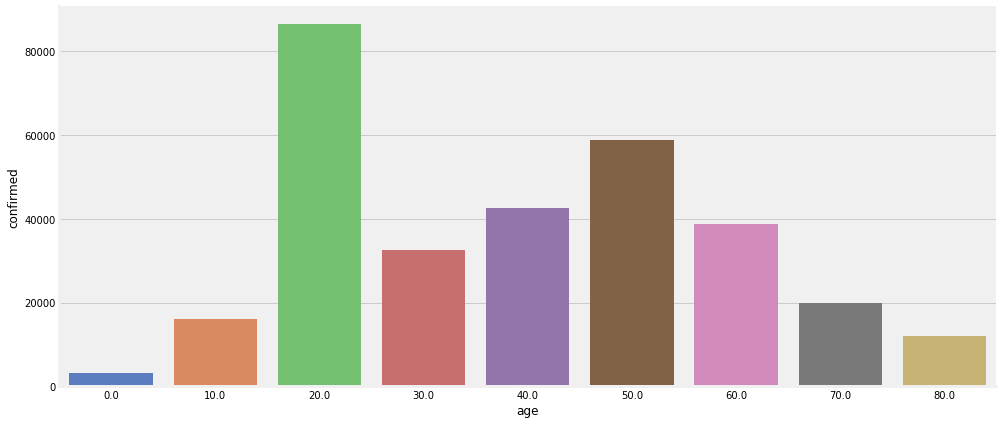

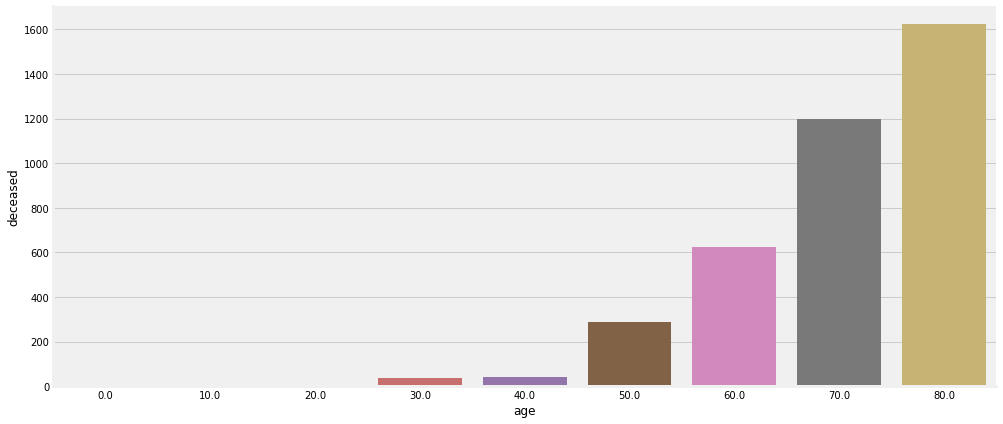

In [134]:
 ####### Confirmed cases w.r.t. Age ######
g  = sns.factorplot(y="confirmed",x="age",data=TimeAge_Stat, kind="bar", size = 6 ,
                    palette = "muted",height=8.27, aspect=11.7/5)
g  = sns.factorplot(y="deceased",x="age",data=TimeAge_Stat, kind="bar", size = 6 ,
                    palette = "muted",height=8.27, aspect=11.7/5)

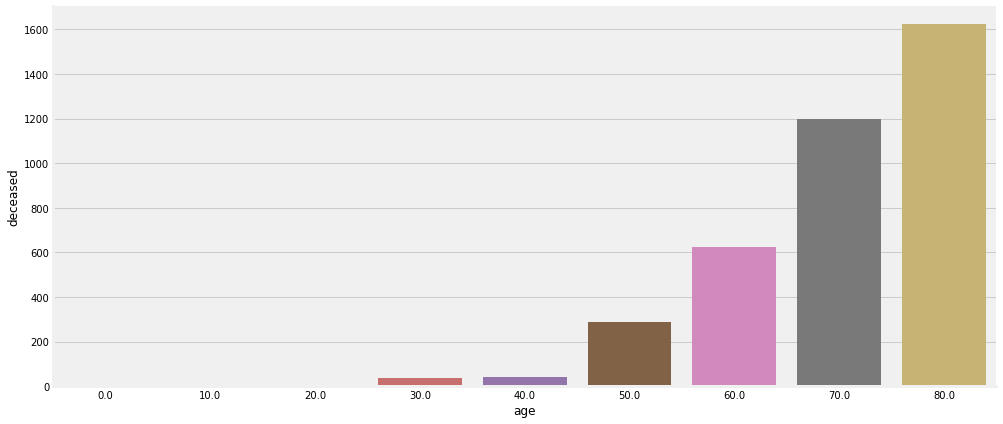

In [135]:
 ####### Deceased cases w.r.t. Age ######
g  = sns.factorplot(y="deceased",x="age",data=TimeAge_Stat, kind="bar", size = 6 ,
                    palette = "muted",height=8.27, aspect=11.7/5)

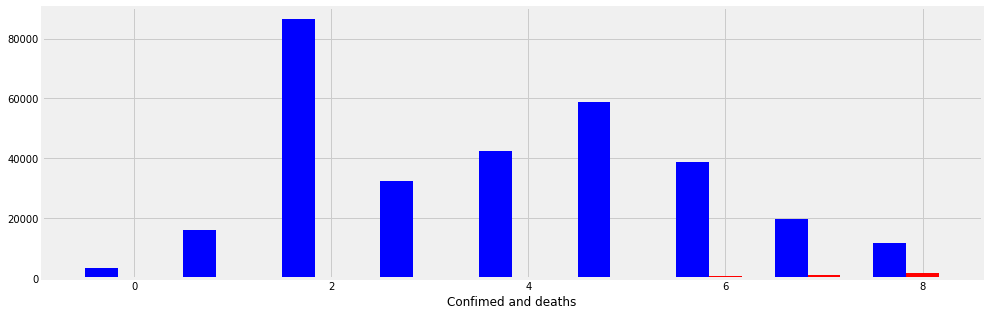

In [136]:
### Confirmed cases and Death Comparision ##

indices = TimeAge_Stat.index
width = np.min(np.diff(indices))/3

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.bar(indices-width,TimeAge_Stat['confirmed'],width,color='b',label='-Ymin')
ax.bar(indices,TimeAge_Stat['deceased'],width,color='r',label='Ymax')
ax.set_xlabel('Confimed and deaths')
plt.show()

### Time Analysis

In [137]:
Time = pd.read_csv(r'C:\Users\E870859\Desktop\Data Science\7. Exploratory data analysis\Country - Covid 19\South Korea\Time.csv')
Time_Copy = Time
Time['date'] = Time['date'].astype('datetime64[ns]') 
Time.set_index('date')

,time,test,negative,confirmed,released,deceased
date,,,,,,
2020-01-20,16,1,0,1,0,0
2020-01-21,16,1,0,1,0,0
2020-01-22,16,4,3,1,0,0
2020-01-23,16,22,21,1,0,0
2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...
2020-04-03,0,443273,414303,10062,6021,174
2020-04-04,0,455032,424732,10156,6325,177
2020-04-05,0,461233,431425,10237,6463,183


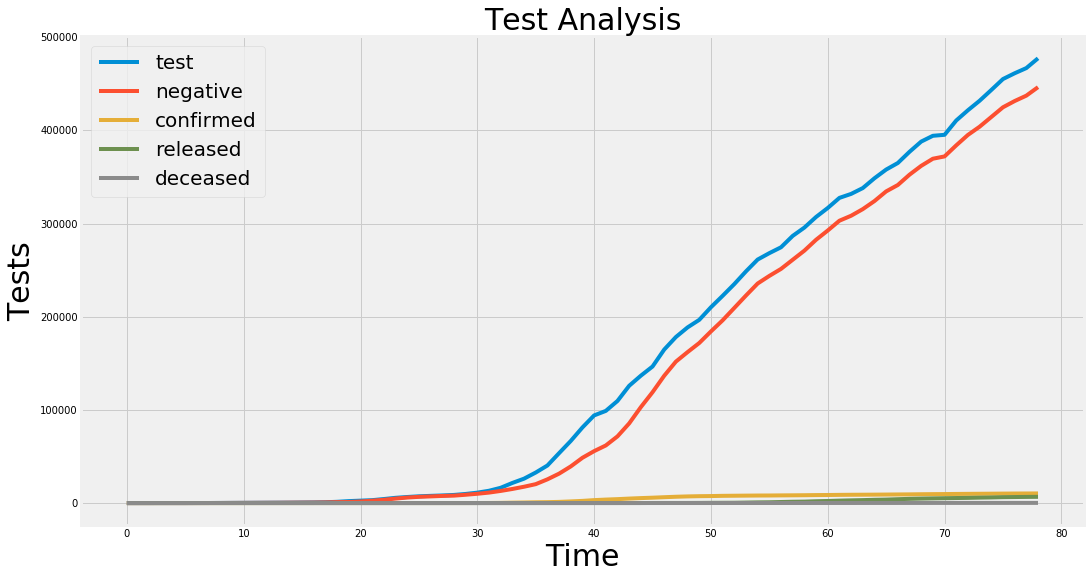

In [138]:
plt.figure(figsize=(16, 9))
plt.plot(Time['test'])
plt.plot(Time['negative'])
plt.plot(Time['confirmed'])
plt.plot(Time['released'])
plt.plot(Time['deceased'])
plt.title('Test Analysis', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Tests', size=30)
plt.legend(['test', 'negative', 'confirmed', 'released', 'deceased'], prop={'size': 20})

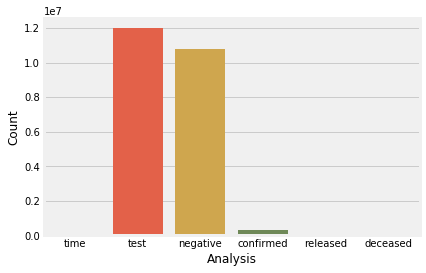

In [139]:
Time_Stat = Time.sum()
Time_Stat = Time_Stat.to_frame()
Time_Stat.reset_index(inplace = True) 
Time_Stat.rename(columns = {'index':'Analysis',0: 'Count'}, inplace = True)
g  = sns.barplot(x='Analysis', y='Count',data=Time_Stat)

#Time_Stat = Time_Copy['negative', 'confirmed'].sum()

## TimeGender Analysis

In [140]:
TimeGender = pd.read_csv(r'C:\Users\E870859\Desktop\Data Science\7. Exploratory data analysis\Country - Covid 19\South Korea\TimeGender.csv')
TimeGender

TimeGender_Copy = TimeGender
TimeGender['date'] = TimeGender['date'].astype('datetime64[ns]') 
TimeGender.set_index('date')

,time,sex,confirmed,deceased
date,,,,
2020-03-02,0,male,1591,13
2020-03-02,0,female,2621,9
2020-03-03,0,male,1810,16
2020-03-03,0,female,3002,12
2020-03-04,0,male,1996,20
...,...,...,...,...
2020-04-05,0,female,6139,86
2020-04-06,0,male,4118,98
2020-04-06,0,female,6166,88


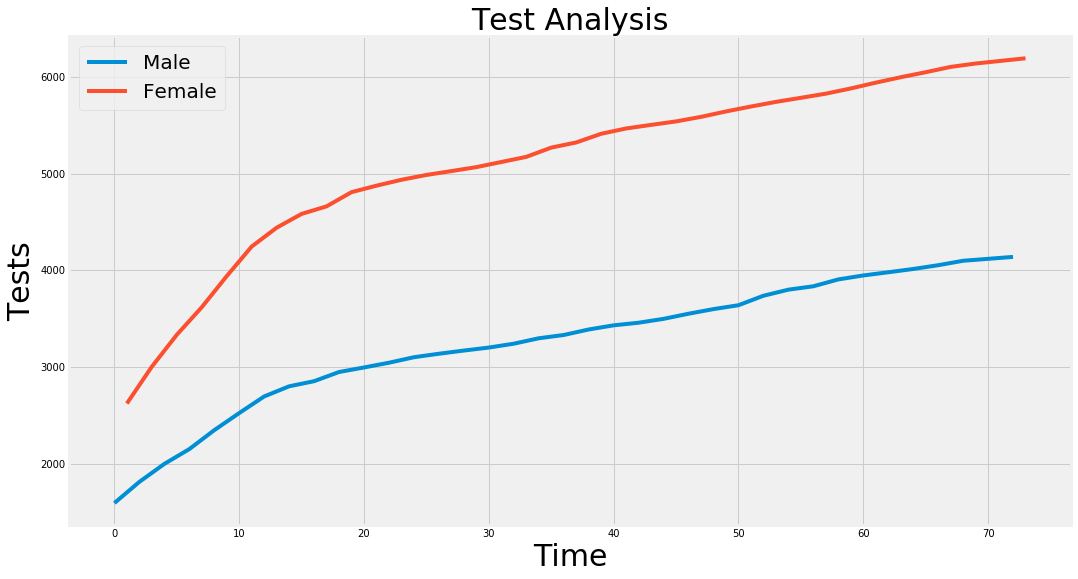

In [141]:
plt.figure(figsize=(16, 9))
MaleCases = TimeGender[TimeGender['sex'] == 'male']
FemaleCases = TimeGender[TimeGender['sex'] == 'female']
plt.plot(MaleCases['confirmed'])
plt.plot(FemaleCases['confirmed'])
plt.title('Test Analysis', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Tests', size=30)
plt.legend(['Male', 'Female'], prop={'size': 20})

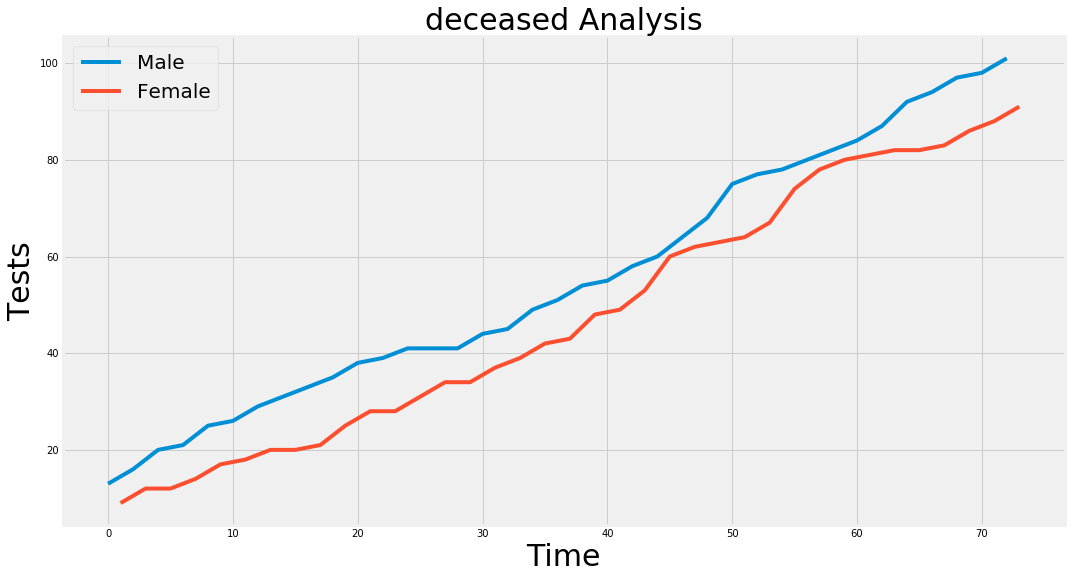

In [142]:
plt.figure(figsize=(16, 9))
MaleCases = TimeGender[TimeGender['sex'] == 'male']
FemaleCases = TimeGender[TimeGender['sex'] == 'female']
plt.plot(MaleCases['deceased'])
plt.plot(FemaleCases['deceased'])
plt.title('deceased Analysis', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Tests', size=30)
plt.legend(['Male', 'Female'], prop={'size': 20})

## TimeProvince Analysis

In [143]:
TimeProvince = pd.read_csv(r'C:\Users\E870859\Desktop\Data Science\7. Exploratory data analysis\Country - Covid 19\South Korea\TimeProvince.csv')
TimeProvince

TimeProvince_Copy = TimeProvince
TimeProvince['date'] = TimeProvince['date'].astype('datetime64[ns]') 
TimeProvince.set_index('date')

,time,province,confirmed,released,deceased
date,,,,,
2020-01-20,16,Seoul,0,0,0
2020-01-20,16,Busan,0,0,0
2020-01-20,16,Daegu,0,0,0
2020-01-20,16,Incheon,1,0,0
2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...
2020-04-07,0,Jeollabuk-do,16,7,0
2020-04-07,0,Jeollanam-do,15,4,0
2020-04-07,0,Gyeongsangbuk-do,1317,934,46


In [144]:
TimeProvince_Stat = TimeProvince_Copy.groupby('date')['confirmed','deceased','released'].sum()
TimeProvince_Stat

,confirmed,deceased,released
date,,,
2020-01-20,1,0,0
2020-01-21,1,0,0
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
...,...,...,...
2020-04-03,9798,174,6020
2020-04-04,9877,177,6324
2020-04-05,9934,183,6461


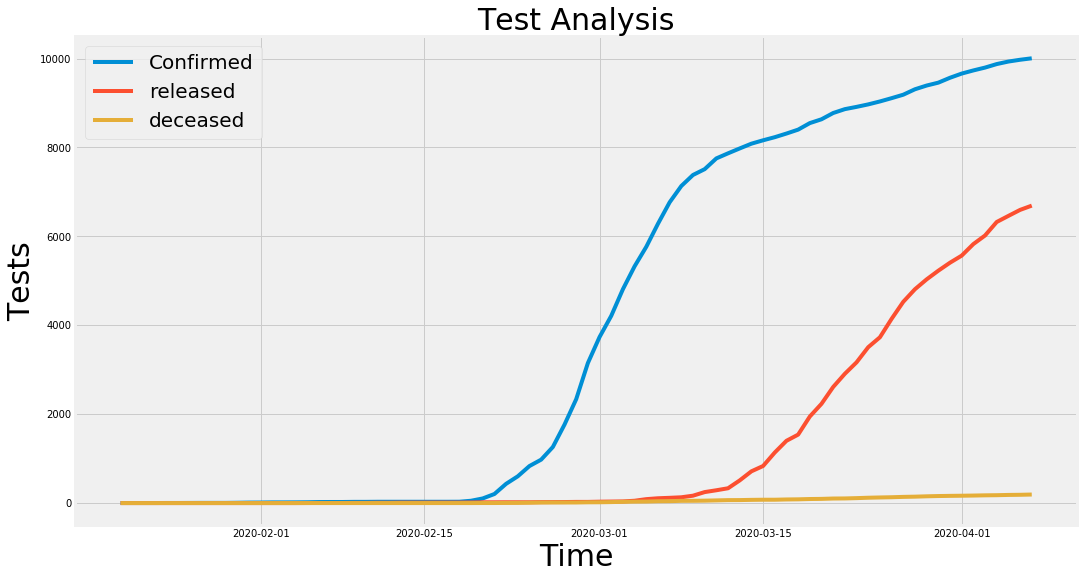

In [145]:
plt.figure(figsize=(16, 9))
plt.plot(TimeProvince_Stat['confirmed'])
plt.plot(TimeProvince_Stat['released'])
plt.plot(TimeProvince_Stat['deceased'])
plt.title('Test Analysis', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Tests', size=30)
plt.legend(['Confirmed', 'released','deceased'], prop={'size': 20})

In [146]:
Province_Stat = TimeProvince_Copy.groupby('province')['confirmed','deceased','released'].max()
Province_Stat.reset_index(inplace = True) 
Province_Stat

,province,confirmed,deceased,released
0,Busan,123,3,91
1,Chungcheongbuk-do,45,0,29
2,Chungcheongnam-do,137,0,104
3,Daegu,6794,134,4918
4,Daejeon,39,0,20
5,Gangwon-do,47,1,24
6,Gwangju,27,0,15
7,Gyeonggi-do,590,7,226
8,Gyeongsangbuk-do,1317,46,934
9,Gyeongsangnam-do,112,0,80


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

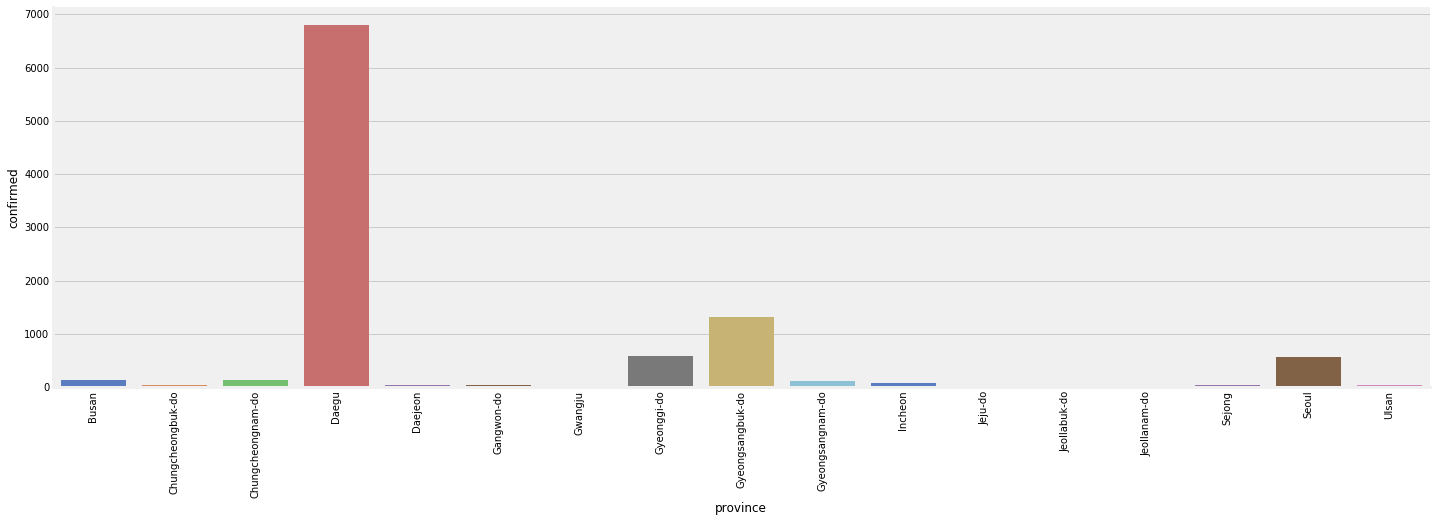

In [147]:
g = sns.factorplot(y="confirmed",x="province",data=Province_Stat, kind="bar", size = 6 ,
                    palette = "muted",height=8.27, aspect=11.7/3.5)
plt.xticks(rotation = 90)
# TimeProvince_Copy

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

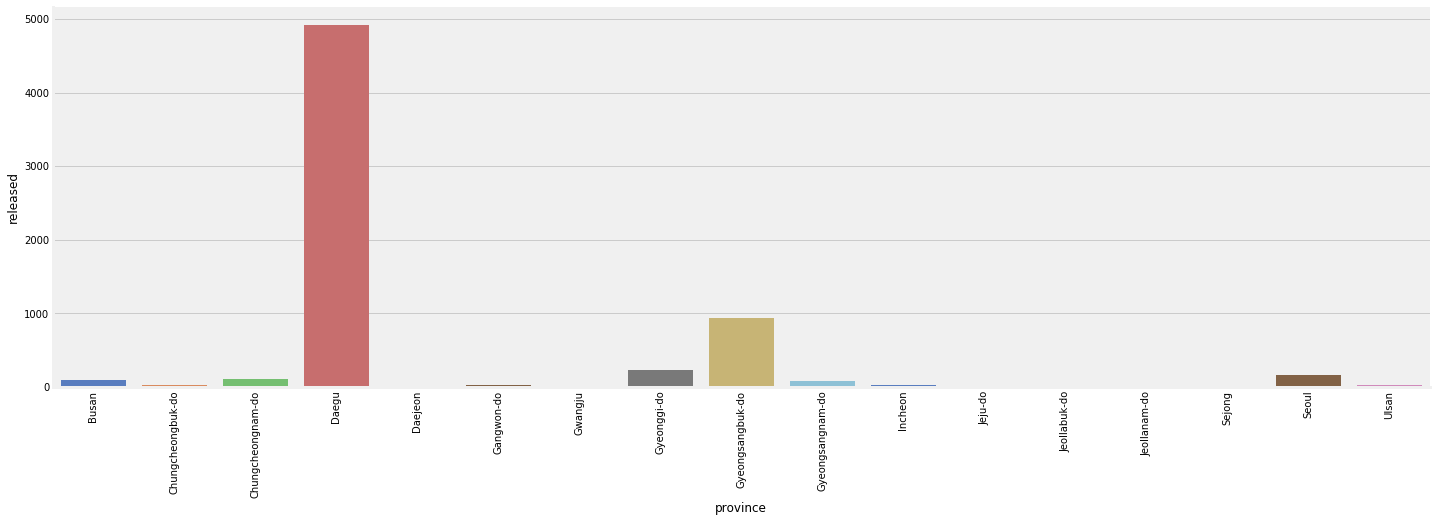

In [148]:
g = sns.factorplot(y="released",x="province",data=Province_Stat, kind="bar", size = 6 ,
                    palette = "muted",height=8.27, aspect=11.7/3.5)
plt.xticks(rotation = 90)
# TimeProvince_Copy

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

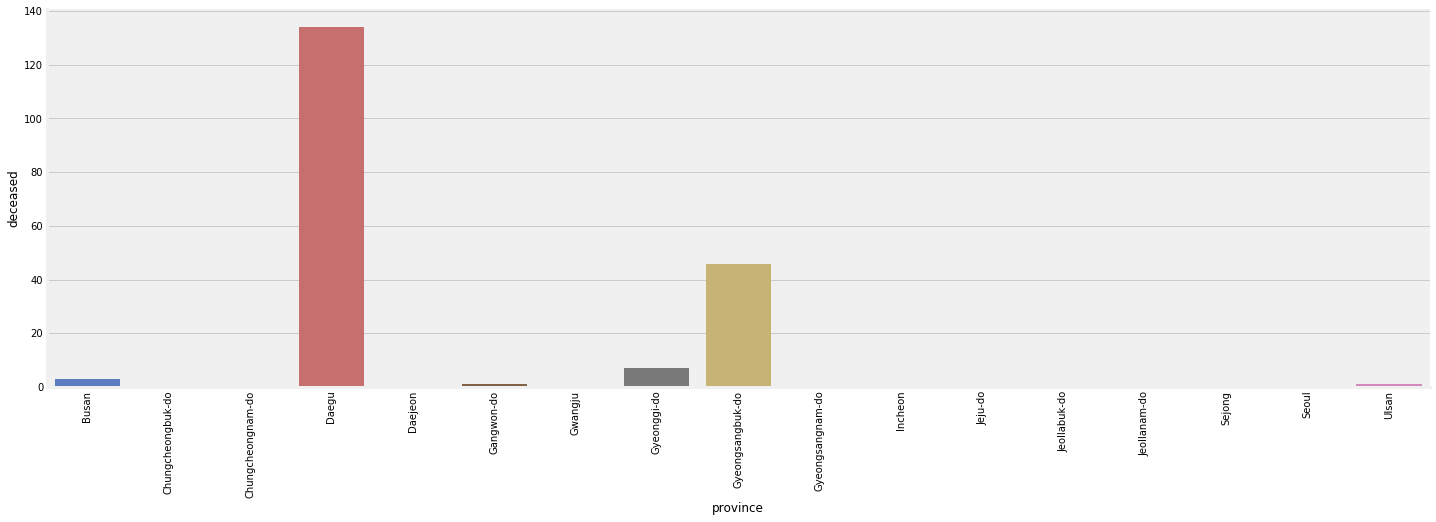

In [149]:
g = sns.factorplot(y="deceased",x="province",data=Province_Stat, kind="bar", size = 6 ,
                    palette = "muted",height=8.27, aspect=11.7/3.5)
plt.xticks(rotation = 90)

## Modeling 

------------------Data Merging--------------------

In [150]:
Weather = pd.read_csv(r'C:\Users\E870859\Desktop\Data Science\7. Exploratory data analysis\Country - Covid 19\South Korea\Weather.csv')
Weather['date'] = Weather['date'].astype('datetime64[ns]') 
Weather_2020 = Weather[(Weather['date'] > '12/31/2019')]
Weather_2020.rename(columns = {'date':'confirmed_date'}, inplace = True)
Weather_2020

C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,code,province,confirmed_date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
23375,10000,Seoul,2020-01-01,-2.2,-6.5,0.3,0.1,2.6,50.0,64.4
23376,11000,Busan,2020-01-01,1.9,-3.2,7.8,0.0,5.1,340.0,44.0
23377,12000,Daegu,2020-01-01,0.2,-4.9,4.6,0.0,5.6,270.0,53.3
23378,13000,Gwangju,2020-01-01,-0.3,-4.9,5.7,0.0,4.3,50.0,58.0
23379,14000,Incheon,2020-01-01,-1.4,-5.4,1.9,0.0,3.8,160.0,66.6
...,...,...,...,...,...,...,...,...,...,...
24922,50000,Jeollabuk-do,2020-04-06,8.4,0.6,17.4,0.0,4.8,140.0,49.9
24923,51000,Jeollanam-do,2020-04-06,10.8,5.2,15.9,0.0,6.8,200.0,45.9
24924,60000,Gyeongsangbuk-do,2020-04-06,10.8,0.9,17.3,0.0,5.9,180.0,43.1
24925,61000,Gyeongsangnam-do,2020-04-06,10.2,3.8,17.0,0.0,5.2,360.0,46.3


In [151]:
# apply "Vlookup" in padas
Covid_2020_Details = PatientInfo.merge(Weather_2020, how='left', on=['province', 'confirmed_date'])
Covid_2020_Details

,patient_id,sex,age,country,province,city,disease,infection_case,infected_by,contact_number,confirmed_date,state,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,1000000001,male,50.0,Korea,Seoul,Gangseo-gu,False,overseas inflow,0,75,2020-01-23,released,10000.0,4.6,0.0,9.9,0.0,4.7,290.0,49.3
1,1000000002,male,30.0,Korea,Seoul,Jungnang-gu,False,overseas inflow,0,31,2020-01-30,released,10000.0,5.2,1.4,10.4,0.0,3.0,70.0,47.0
2,1000000003,male,50.0,Korea,Seoul,Jongno-gu,False,contact with patient,2002000001,17,2020-01-30,released,10000.0,5.2,1.4,10.4,0.0,3.0,70.0,47.0
3,1000000004,male,20.0,Korea,Seoul,Mapo-gu,False,overseas inflow,0,9,2020-01-30,released,10000.0,5.2,1.4,10.4,0.0,3.0,70.0,47.0
4,1000000005,female,20.0,Korea,Seoul,Seongbuk-gu,False,contact with patient,1000000002,2,2020-01-31,released,10000.0,3.9,1.4,8.9,0.0,4.4,270.0,59.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,7000000005,female,20.0,Korea,Jeju-do,Jeju-do,False,overseas inflow,0,20,2020-03-24,isolated,70000.0,12.6,8.8,15.8,0.0,6.3,50.0,62.8
3124,7000000006,male,30.0,United States,Jeju-do,Jeju-do,False,overseas inflow,0,23,2020-03-24,isolated,70000.0,12.6,8.8,15.8,0.0,6.3,50.0,62.8
3125,7000000007,female,20.0,Korea,Jeju-do,Jeju-do,False,overseas inflow,0,26,2020-03-25,isolated,70000.0,16.3,10.8,20.9,0.0,5.7,110.0,56.4
3126,7000000008,female,10.0,Korea,Jeju-do,Jeju-do,False,overseas inflow,0,25,2020-03-27,isolated,70000.0,12.0,8.4,19.9,0.0,7.1,270.0,82.5


In [152]:
## Droping Unwanted columns 
Covid_2020_Details = Covid_2020_Details.drop(['code','infected_by','confirmed_date','patient_id'], axis=1)

In [153]:
# Covid_2020_Details.fillna(Covid_2020_Details.mean())
Covid_2020_Details['avg_temp'].fillna((Covid_2020_Details['avg_temp'].mean()), inplace=True)
Covid_2020_Details['min_temp'].fillna((Covid_2020_Details['min_temp'].mean()), inplace=True)
Covid_2020_Details['max_temp'].fillna((Covid_2020_Details['max_temp'].mean()), inplace=True)
Covid_2020_Details['precipitation'].fillna((Covid_2020_Details['precipitation'].mean()), inplace=True)
Covid_2020_Details['max_wind_speed'].fillna((Covid_2020_Details['max_wind_speed'].mean()), inplace=True)
Covid_2020_Details['most_wind_direction'].fillna((Covid_2020_Details['most_wind_direction'].mean()), inplace=True)
Covid_2020_Details['avg_relative_humidity'].fillna((Covid_2020_Details['avg_relative_humidity'].mean()), inplace=True)

In [154]:
# Covid_2020_Details.to_csv("Covid_2020_Details.csv")

as some of data where age sex was missing where we have added unknown as another rage column and age as average ages of perosm which will create noise in model, hence we will removibg those row.

In [155]:
Covid_2020_Details = Covid_2020_Details[(Covid_2020_Details['sex'] != 'Unknown')]
Covid_2020_Details

,sex,age,country,province,city,disease,infection_case,contact_number,state,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,male,50.0,Korea,Seoul,Gangseo-gu,False,overseas inflow,75,released,4.6,0.0,9.9,0.0,4.7,290.0,49.3
1,male,30.0,Korea,Seoul,Jungnang-gu,False,overseas inflow,31,released,5.2,1.4,10.4,0.0,3.0,70.0,47.0
2,male,50.0,Korea,Seoul,Jongno-gu,False,contact with patient,17,released,5.2,1.4,10.4,0.0,3.0,70.0,47.0
3,male,20.0,Korea,Seoul,Mapo-gu,False,overseas inflow,9,released,5.2,1.4,10.4,0.0,3.0,70.0,47.0
4,female,20.0,Korea,Seoul,Seongbuk-gu,False,contact with patient,2,released,3.9,1.4,8.9,0.0,4.4,270.0,59.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,female,20.0,Korea,Jeju-do,Jeju-do,False,overseas inflow,20,isolated,12.6,8.8,15.8,0.0,6.3,50.0,62.8
3124,male,30.0,United States,Jeju-do,Jeju-do,False,overseas inflow,23,isolated,12.6,8.8,15.8,0.0,6.3,50.0,62.8
3125,female,20.0,Korea,Jeju-do,Jeju-do,False,overseas inflow,26,isolated,16.3,10.8,20.9,0.0,5.7,110.0,56.4
3126,female,10.0,Korea,Jeju-do,Jeju-do,False,overseas inflow,25,isolated,12.0,8.4,19.9,0.0,7.1,270.0,82.5


In [156]:
# #Converting certain features to categorical form
categorical_features_Covid_2020 = ['province']
Covid_2020_Details[categorical_features_Covid_2020] = Covid_2020_Details[categorical_features_Covid_2020].astype('category')
Covid_2020_Details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3034 entries, 0 to 3127
Data columns (total 16 columns):
sex                      3034 non-null category
age                      3034 non-null float64
country                  3034 non-null category
province                 3034 non-null category
city                     3034 non-null category
disease                  3034 non-null category
infection_case           3034 non-null category
contact_number           3034 non-null int64
state                    3034 non-null category
avg_temp                 3034 non-null float64
min_temp                 3034 non-null float64
max_temp                 3034 non-null float64
precipitation            3034 non-null float64
max_wind_speed           3034 non-null float64
most_wind_direction      3034 non-null float64
avg_relative_humidity    3034 non-null float64
dtypes: category(7), float64(8), int64(1)
memory usage: 269.2 KB


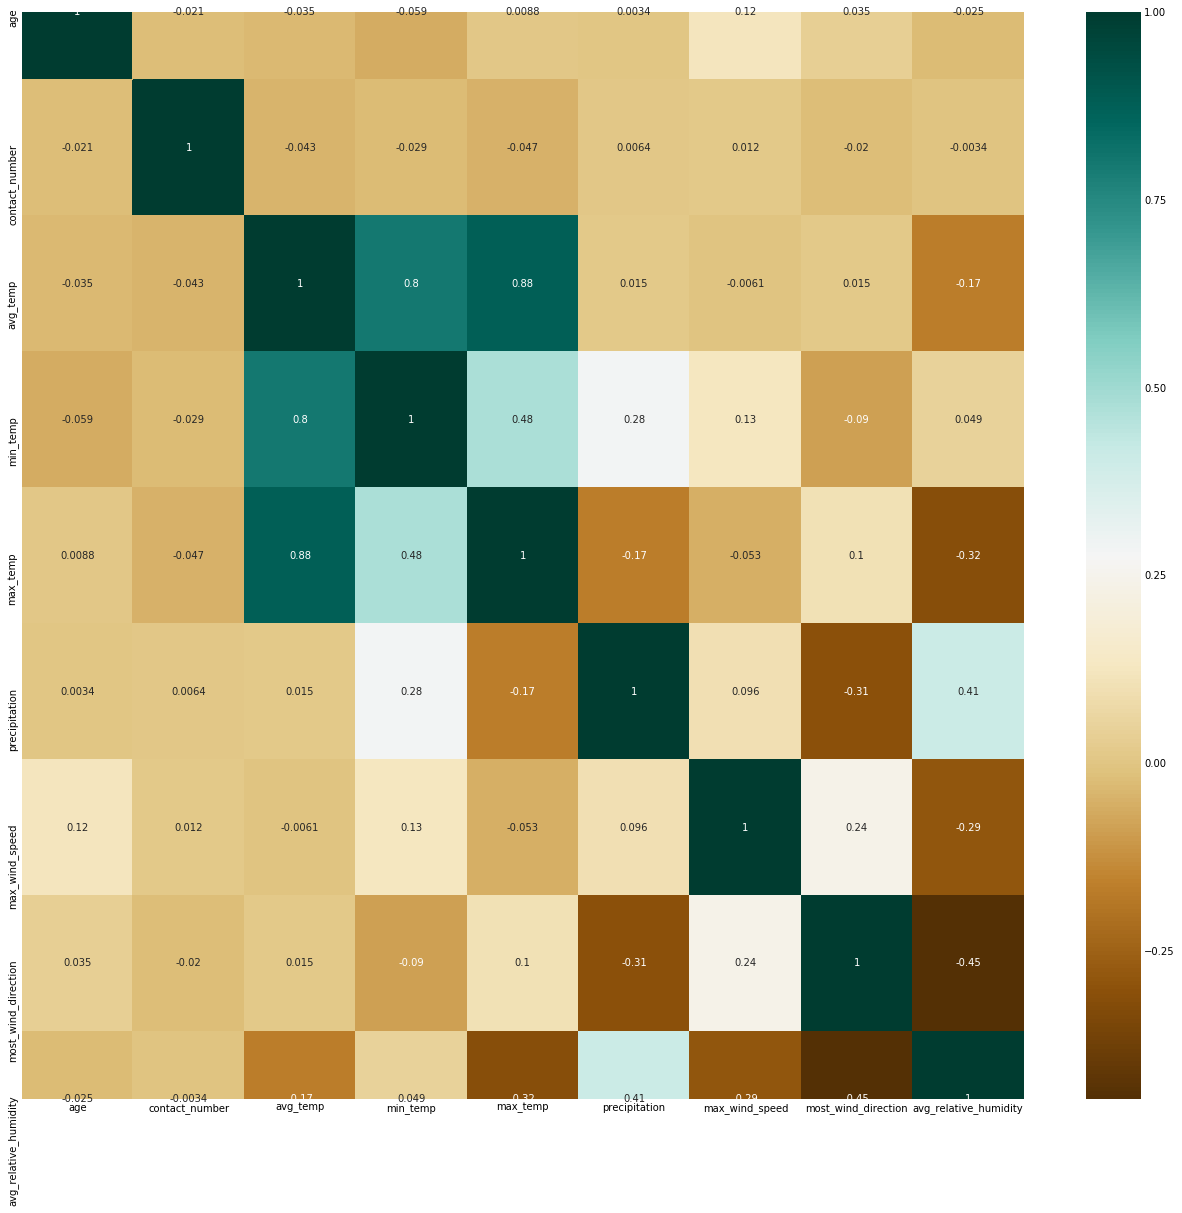

In [157]:
plt.figure(figsize=(20,20))
g = sns.heatmap(Covid_2020_Details.corr(),cmap="BrBG",annot=True)

## Using LabelEncode library

In [158]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [159]:
# Here applying label encoder to categorical attribute by using column key name.
Covid_2020_Details['sex']=labelencoder.fit_transform(Covid_2020_Details['sex'])
Covid_2020_Details['country']=labelencoder.fit_transform(Covid_2020_Details['country'])
Covid_2020_Details['province']=labelencoder.fit_transform(Covid_2020_Details['province'])
Covid_2020_Details['city']=labelencoder.fit_transform(Covid_2020_Details['city'])
Covid_2020_Details['infection_case']=labelencoder.fit_transform(Covid_2020_Details['infection_case'])
Covid_2020_Details['state']=labelencoder.fit_transform(Covid_2020_Details['state'])

In [160]:
Covid_2020_Details['disease'] = Covid_2020_Details['disease'].map({'TRUE':1, 'FALSE':0})

In [161]:
Covid_2020_Details['disease']=labelencoder.fit_transform(Covid_2020_Details['disease'])

In [162]:
Covid_2020_Details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3034 entries, 0 to 3127
Data columns (total 16 columns):
sex                      3034 non-null int32
age                      3034 non-null float64
country                  3034 non-null int32
province                 3034 non-null int32
city                     3034 non-null int32
disease                  3034 non-null int64
infection_case           3034 non-null int32
contact_number           3034 non-null int64
state                    3034 non-null int32
avg_temp                 3034 non-null float64
min_temp                 3034 non-null float64
max_temp                 3034 non-null float64
precipitation            3034 non-null float64
max_wind_speed           3034 non-null float64
most_wind_direction      3034 non-null float64
avg_relative_humidity    3034 non-null float64
dtypes: float64(8), int32(6), int64(2)
memory usage: 331.8 KB


In [163]:
y=Covid_2020_Details['state'].values
x=Covid_2020_Details.drop(['state'],axis=1).values

In [164]:
# dataset split.
train_size=0.80
test_size=0.20
seed=5

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)

In [165]:
print(X_train.shape)
print(y_train.shape)

(2427, 15)
(2427,)


C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:

LogisticRegression : 0.725596 (0.031746)
knn : 0.808392 (0.032623)


C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C

SVC : 0.674525 (0.026922)
decision_tree : 0.797271 (0.030623)
Naive Bayes : 0.627946 (0.072634)


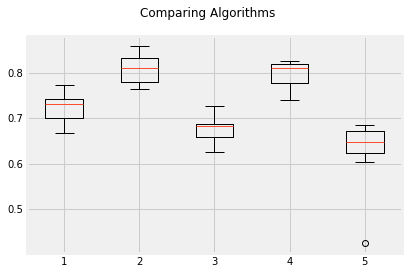

In [166]:
n_neighbors=5
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# keeping all models in one list
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('knn',KNeighborsClassifier(n_neighbors=n_neighbors)))
models.append(('SVC',SVC()))
models.append(("decision_tree",DecisionTreeClassifier()))
models.append(('Naive Bayes',GaussianNB()))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

names=[]
predictions=[]
error='accuracy'
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,X_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)\
    
# # Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()

C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:

LogisticRegression : 0.725596 (0.031746)
knn : 0.808392 (0.032623)


C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C

SVC : 0.674525 (0.026922)
decision_tree : 0.794798 (0.027288)
Naive Bayes : 0.627946 (0.072634)


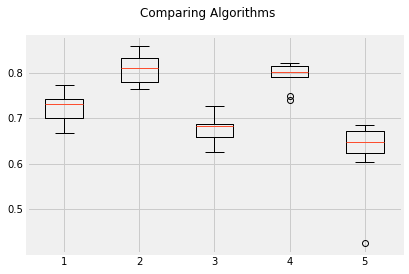

In [167]:
# Spot Checking and Comparing Algorithms With StandardScaler Scaler
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
pipelines=[]
pipelines.append(('scaled Logisitic Regression',Pipeline([('scaler',StandardScaler()),('LogisticRegression',LogisticRegression())])))
pipelines.append(('scaled KNN',Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsClassifier(n_neighbors=n_neighbors))])))
pipelines.append(('scaled SVC',Pipeline([('scaler',StandardScaler()),('SVC',SVC())])))
pipelines.append(('scaled DecisionTree',Pipeline([('scaler',StandardScaler()),('decision',DecisionTreeClassifier())])))
pipelines.append(('scaled naive bayes',Pipeline([('scaler',StandardScaler()),('scaled Naive Bayes',GaussianNB())])))

# # Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,X_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# # Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()

----------Adaboost-------------

In [168]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                          random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
clf.feature_importances_
clf.score(X_test,y_test)

0.7627677100494233

--------XGBoost-------

In [169]:
import xgboost
classifier=xgboost.XGBClassifier()

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train, y_train,cv=10)

score
score.mean()

0.8570318930041152

## Neural Network 

In [170]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [171]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [172]:
# Initialising the ANN
classifier = Sequential()

In [173]:
X_train.shape

(2427, 15)

In [174]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 12, init = 'he_uniform',activation='relu',input_dim = 15))

C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=15, units=12, kernel_initializer="he_uniform")`
  


In [175]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 12, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=12, kernel_initializer="he_uniform")`
  
C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  after removing the cwd from sys.path.


In [176]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [177]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

C:\Users\E870859\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1626 samples, validate on 801 samples
Epoch 1/100
1626/1626 [==============================] - 1s 597us/step - loss: -0.5854 - accuracy: 0.5357 - val_loss: -1.5368 - val_accuracy: 0.6142
Epoch 2/100
1626/1626 [==============================] - 0s 219us/step - loss: -2.8975 - accuracy: 0.5941 - val_loss: -4.2336 - val_accuracy: 0.6142
Epoch 3/100
1626/1626 [==============================] - 0s 213us/step - loss: -6.6870 - accuracy: 0.5947 - val_loss: -9.1536 - val_accuracy: 0.6142
Epoch 4/100
1626/1626 [==============================] - 0s 223us/step - loss: -13.1779 - accuracy: 0.5947 - val_loss: -16.3629 - val_accuracy: 0.6142
Epoch 5/100
1626/1626 [==============================] - 0s 215us/step - loss: -22.5700 - accuracy: 0.5947 - val_loss: -27.0794 - val_accuracy: 0.6142
Epoch 6/100
1626/1626 [==============================] - 0s 216us/step - loss: -36.7607 - accuracy: 0.5947 - val_loss: -43.3413 - val_accuracy: 0.6142
Epoch 7/100
1626/1626 [==============================

In [178]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)
y_pred

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))

[[  0  12   0]
 [  0 383   0]
 [  0 212   0]]


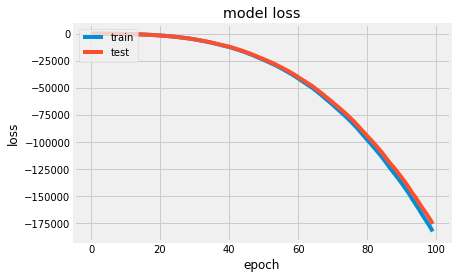

In [179]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Conclusion ##

In case of classification model if we need to predict death probability of individual based on
infection, area, province, city ,weather condition , age group and other factors, we can go with ensembale techniques with XGBOOST as it is giving 85 % of accuracy

################### End ################